The following code analyzes a dataset of global average sea level change since the year 1880. A linear machine learning model was trained to examine two measurements of sea levels (CSIRO/NOAA Adjusted Sea Levels) over varying periods of time and was told to predict sea levels in the year 2050. 

In [723]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from matplotlib.pyplot import figure

import warnings
warnings.filterwarnings("ignore")

In [724]:
df = pd.read_csv('epa-sea-level.csv',
                 usecols = ['Year', 'CSIRO Adjusted Sea Level', 'NOAA Adjusted Sea Level'])
df

,Year,CSIRO Adjusted Sea Level,NOAA Adjusted Sea Level
0,1880,0.000000,NaN
1,1881,0.220472,NaN
2,1882,-0.440945,NaN
3,1883,-0.232283,NaN
4,1884,0.590551,NaN
...,...,...,...
129,2009,8.586614,8.046354
130,2010,8.901575,8.122973
131,2011,8.964567,8.053065
132,2012,9.326772,8.457058


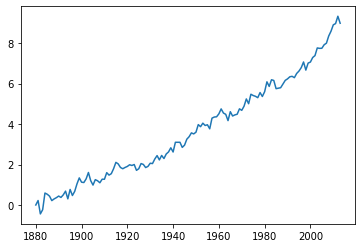

In [725]:
plt.plot(df['Year'], df['CSIRO Adjusted Sea Level'])

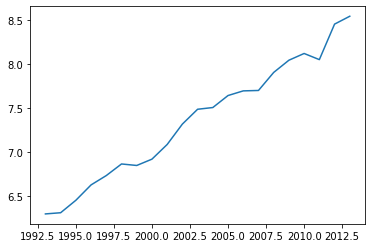

In [726]:
plt.plot(df['Year'], df['NOAA Adjusted Sea Level'])

<font size="4">Data Cleaning</font>

In [727]:
#Data Cleaning

x = df['Year']
y = df['CSIRO Adjusted Sea Level']
z = df['NOAA Adjusted Sea Level']
print(z[pd.notnull(z)])

z = z.dropna()
z_years = x[113:]

113    6.297493
114    6.310934
115    6.452569
116    6.627631
117    6.733920
118    6.865806
119    6.848690
120    6.920582
121    7.087460
122    7.319698
123    7.488353
124    7.507933
125    7.644563
126    7.697420
127    7.702147
128    7.907365
129    8.046354
130    8.122973
131    8.053065
132    8.457058
133    8.546648
Name: NOAA Adjusted Sea Level, dtype: float64


In [728]:
df_extend = pd.DataFrame({
    'Year':range(2014,2051),
    'CSIRO Adjusted Sea Level':np.nan,
    'NOAA Adjusted Sea Level':np.nan
})
df = df.append(df_extend)
print(df)

X = df['Year'] #range of values (years) for prediction 

    Year  CSIRO Adjusted Sea Level  NOAA Adjusted Sea Level
0   1880                  0.000000                      NaN
1   1881                  0.220472                      NaN
2   1882                 -0.440945                      NaN
3   1883                 -0.232283                      NaN
4   1884                  0.590551                      NaN
..   ...                       ...                      ...
32  2046                       NaN                      NaN
33  2047                       NaN                      NaN
34  2048                       NaN                      NaN
35  2049                       NaN                      NaN
36  2050                       NaN                      NaN

[171 rows x 3 columns]


In [729]:
def polynomial_regression_model(degree):
    
    poly_features = PolynomialFeatures(degree=degree)
    
    x_train = x.values.reshape(-1,1)
    y_train = y.values.reshape(-1,1)
    z_train = z.values.reshape(-1,1)
    z_years_train = z_years.values.reshape(-1,1)

    x_train = poly_features.fit_transform(x_train)
    z_years_train = poly_features.fit_transform(z_years_train)

    #training the model
    LR_model = LinearRegression()
    model_1 = LinearRegression().fit(x_train, y_train) #train using CSIRO Data
    model_2 = LinearRegression().fit(z_years_train, z_train) #train using NOAA data 
    
    #evaluating model for years 2014-2050
    X_test = X.values.reshape(-1,1) 
    X_test = poly_features.fit_transform(X_test)

    predict_1 = model_1.predict(X_test)
    predict_2 = model_2.predict(X_test)
    
    return np.array([predict_1,predict_2])

<font size="4">Plotting Linear Models</font>

<font size="3">Second Degree Linear Model</font>

Year 2050 sea level (CSIRO) estimate is: [12.50138597]
Year 2050 sea level (NOAA) estimate is: [12.68358529]


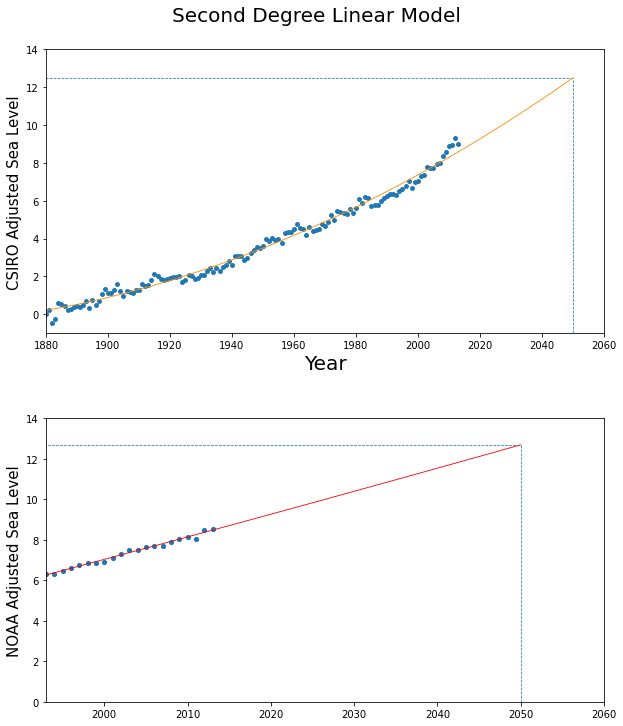

In [732]:
#Second Degree Linear Model

fig, (ax1, ax2) = plt.subplots(2,1)
fig.set_figheight(12)
fig.set_figwidth(10)
fig.subplots_adjust(hspace=0.3)
plt.suptitle('Second Degree Linear Model', y=.93, fontsize=20)

predictions = polynomial_regression_model(2)
predict_1 = predictions[0]
predict_2 = predictions[1]

ax1.scatter(x,y, s=15)
ax1.plot(X,predict_1, 'darkorange', lw=.85)
ax1.hlines(predict_1.max(), 0, 2050, linestyles='dashed', lw=.75)
ax1.vlines(2050, -1, predict_1.max(), linestyles='dashed', lw=.75)
ax1.set_xlabel('Year', fontsize=20)
ax1.set_ylabel('CSIRO Adjusted Sea Level', fontsize=15)
ax1.set_xlim([x.min(),2060])
ax1.set_ylim([-1,14])

ax2.scatter(z_years,z, s=17)
ax2.plot(X, predict_2, 'r', lw=.85)
ax2.hlines(predict_2.max() ,0, 2050, linestyles='dashed', lw=.75)
ax2.vlines(2050, 0, predict_2.max(), linestyles='dashed', lw=.75)
ax2.set_ylabel('NOAA Adjusted Sea Level', fontsize=15)
ax2.set_xlim([z_years.min(),2060])
ax2.set_ylim([0,14])

print('Year 2050 sea level (CSIRO) estimate is: ' + str(predict_1[-1]))
print('Year 2050 sea level (NOAA) estimate is: ' + str(predict_2[-1]))

<font size="3">Third Degree Linear Model</font>

Year 2050 sea level (CSIRO) estimate is: [14.06739237]
Year 2050 sea level (NOAA) estimate is: [18.07710653]


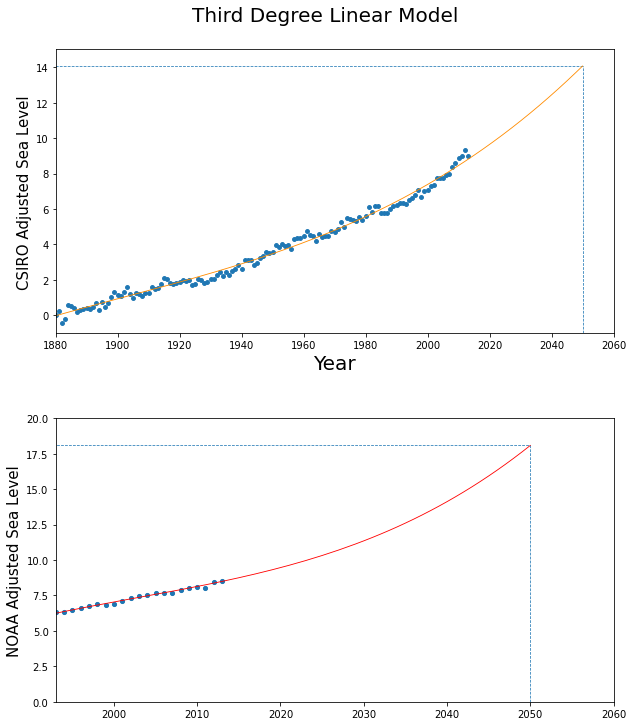

In [731]:
#Third Degree linear Model

fig, (ax1, ax2) = plt.subplots(2,1)
fig.set_figheight(12)
fig.set_figwidth(10)
fig.subplots_adjust(hspace=0.3)
plt.suptitle('Third Degree Linear Model', y=.93, fontsize=20)

predictions = polynomial_regression_model(3)
predict_1 = predictions[0]
predict_2 = predictions[1]

ax1.scatter(x,y, s=15)
ax1.plot(X,predict_1, 'darkorange', lw=.85)
ax1.hlines(predict_1.max(), 0, 2050, linestyles='dashed', lw=.75)
ax1.vlines(2050, -1, predict_1.max(), linestyles='dashed', lw=.75)
ax1.set_xlabel('Year', fontsize=20)
ax1.set_ylabel('CSIRO Adjusted Sea Level', fontsize=15)
ax1.set_xlim([x.min(),2060])
ax1.set_ylim([-1,15])

ax2.scatter(z_years,z, s=17)
ax2.plot(X, predict_2, 'r', lw=.85)
ax2.hlines(predict_2.max() ,0, 2050, linestyles='dashed', lw=.75)
ax2.vlines(2050, 0, predict_2.max(), linestyles='dashed', lw=.75)
ax2.set_ylabel('NOAA Adjusted Sea Level', fontsize=15)
ax2.set_xlim([z_years.min(),2060])
ax2.set_ylim([0,20])

print('Year 2050 sea level (CSIRO) estimate is: ' + str(predict_1[-1]))
print('Year 2050 sea level (NOAA) estimate is: ' + str(predict_2[-1]))

Discussion: After analyzing the various fits on our data, our model shows that in the year 2050 adjusted sea levels may be as low as 12.501, to as high as 18.077. The CSIRO data appears to fit well to both a second and third degree polynomial, but the NOAA data fits most reasonably to a second degree polynomial. Considering recent scientific findings about the rate of climate change (IPCC: AR6 Climate Change 2021: The Physical Science Basis), a cubic fit seems most appropriate for the CSIRO data. Rising sea levels due to global climate change implies further death of oceanic life, contamination of drinking water, loss of habitat, and a higher influx of climate change refugees. Changes must be made NOW in order to preserve our oceans and maintain quality of life. 